In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

# Load the dataset, skipping the first row
for dirname, _, filenames in os.walk('../docs/fadhili1(2)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("success")
df = pd.read_excel('../docs/fadhili1(2).xlsx', skiprows=1)

# Handle summary statistics
print("Summary Statistics:")
print(df.describe())

# Handle missing values
df = df.dropna()
print("Shape after dropping missing values:", df.shape)

# Identify key features and distributions
print("Data Columns:")
print(df.columns)
print(df.isnull().sum())
print(df.head())

success
Summary Statistics:
        Target Yield   Field Size   pH (water)  Organic Carbon  \
count    1364.000000  1364.000000  1362.000000     1362.000000   
mean     5741.502933     1.171364     6.697724       20.601615   
std     17618.668169     2.369286     0.670323       11.213580   
min         0.000000     0.013000     5.100000        3.300000   
25%         0.000000     0.500000     6.300000       13.525000   
50%      1500.000000     0.500000     6.600000       18.300000   
75%      6000.000000     1.000000     7.100000       25.400000   
max    450000.000000    25.000000     8.400000      115.300000   

       Total Nitrogen  Phosphorus (M3)  Potassium (exch.)  Soil moisture  \
count     1362.000000      1362.000000        1362.000000    1362.000000   
mean         1.780250        16.578267           9.526211      14.745668   
std          0.907111        16.030131           6.049402       8.997760   
min          0.300000         0.300000           1.100000       1.900000 

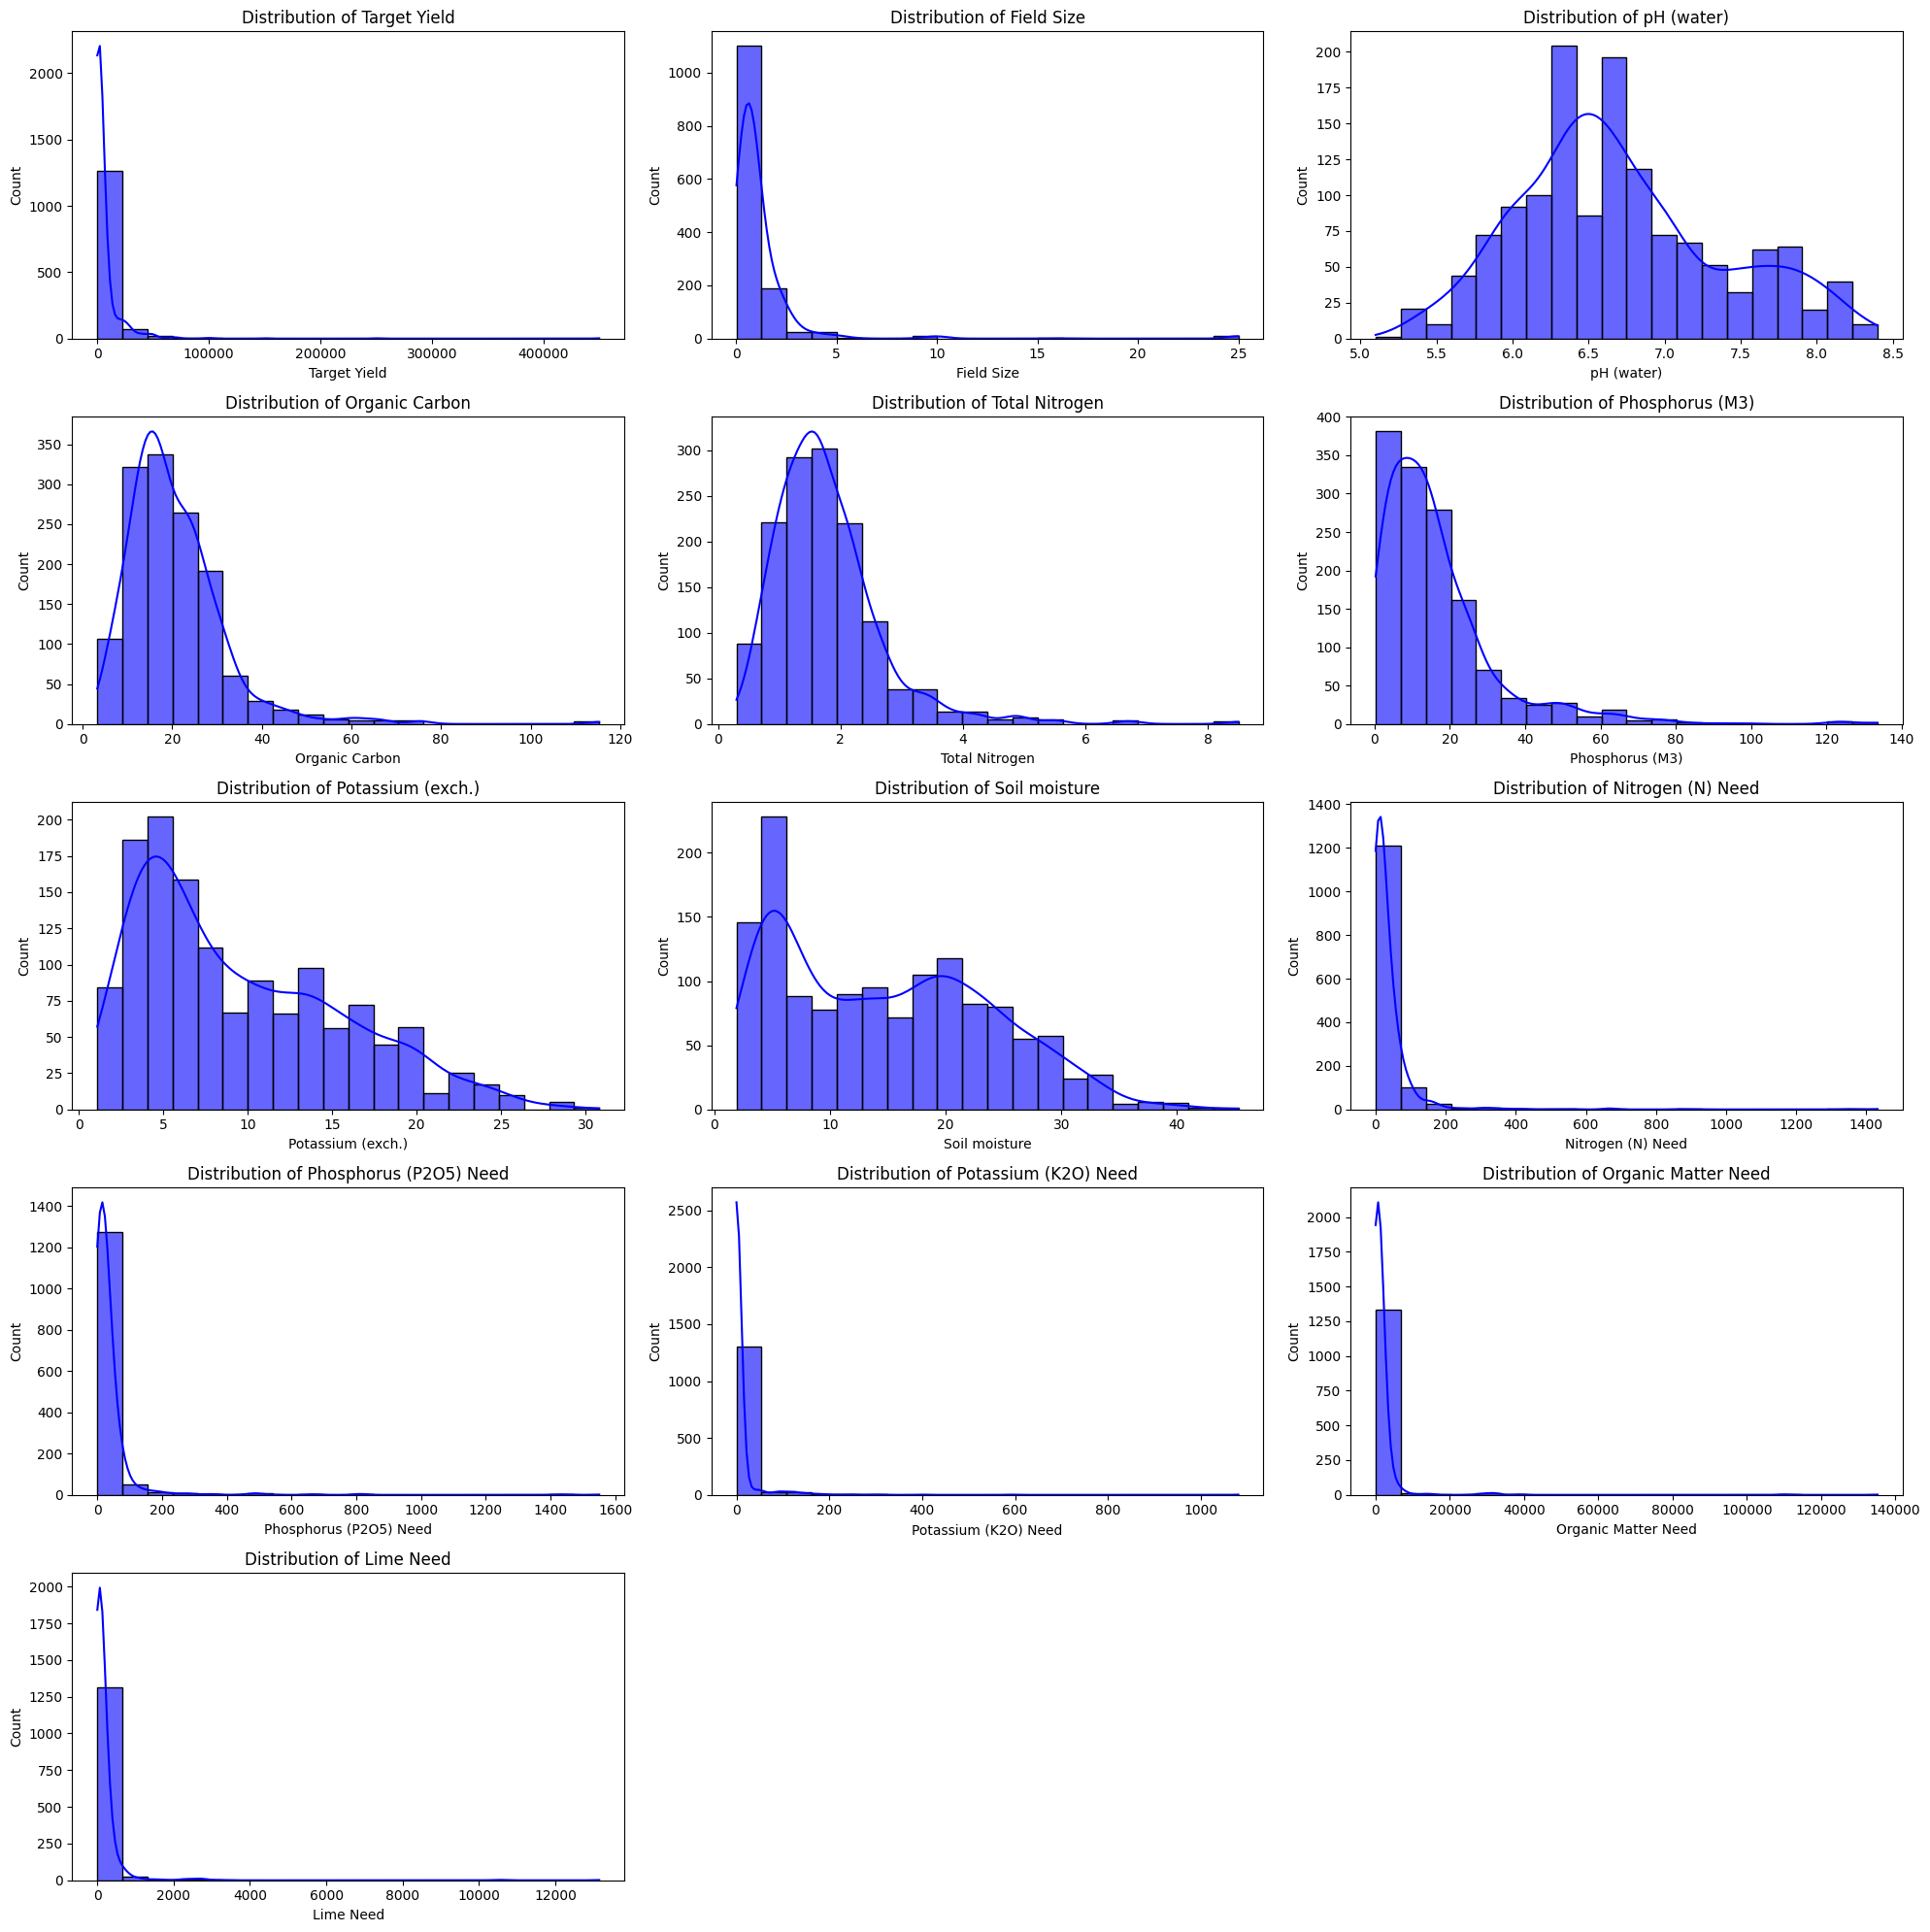

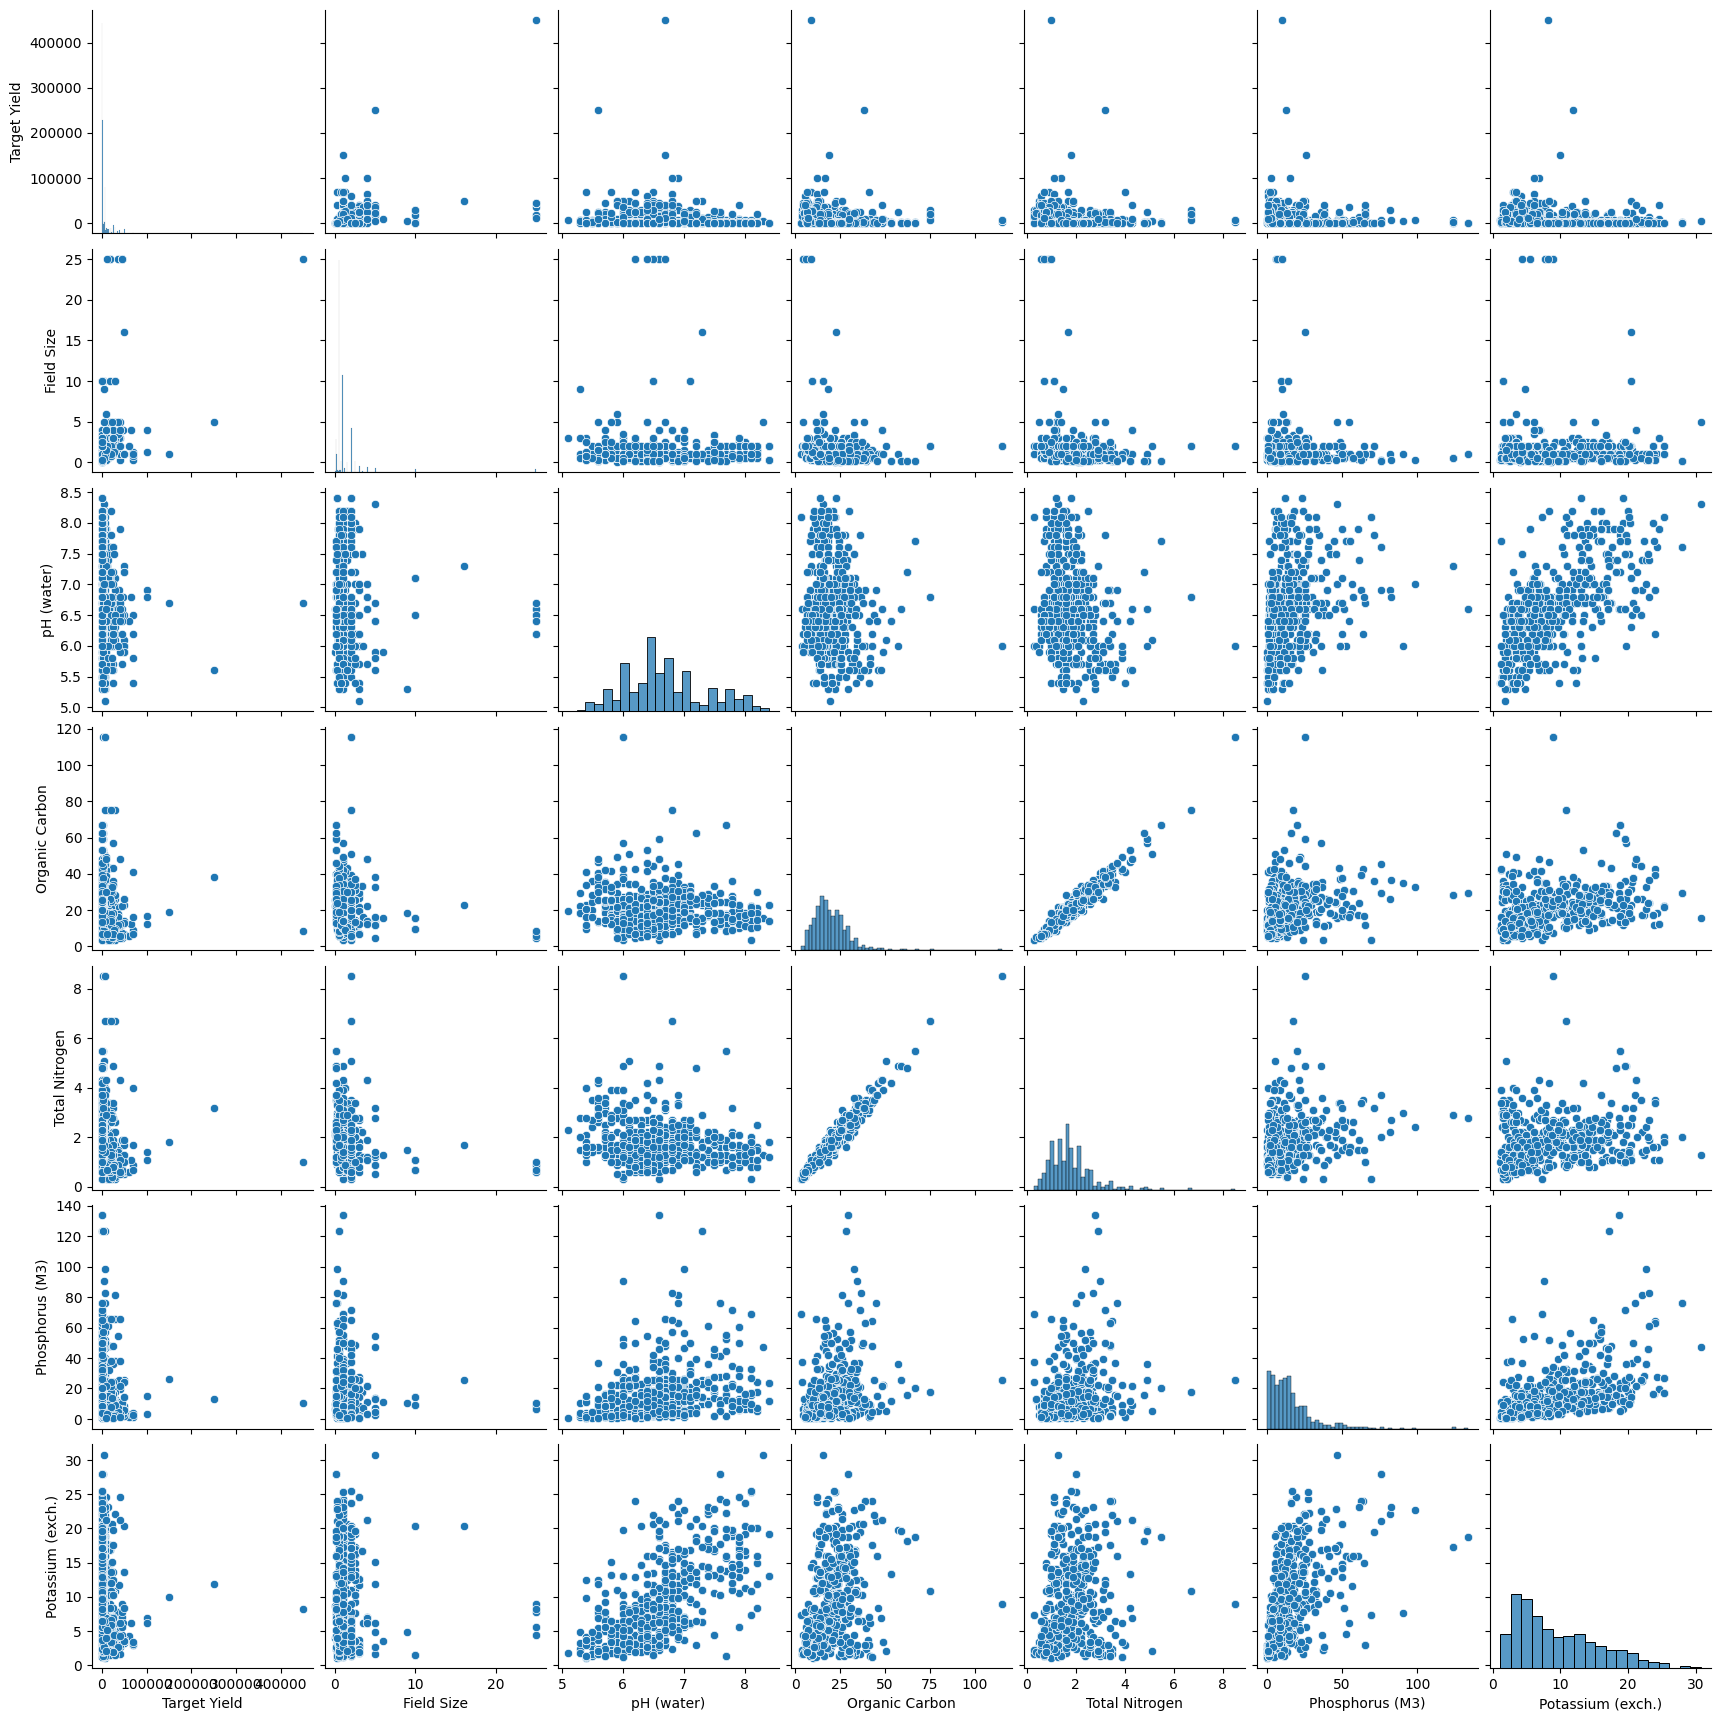

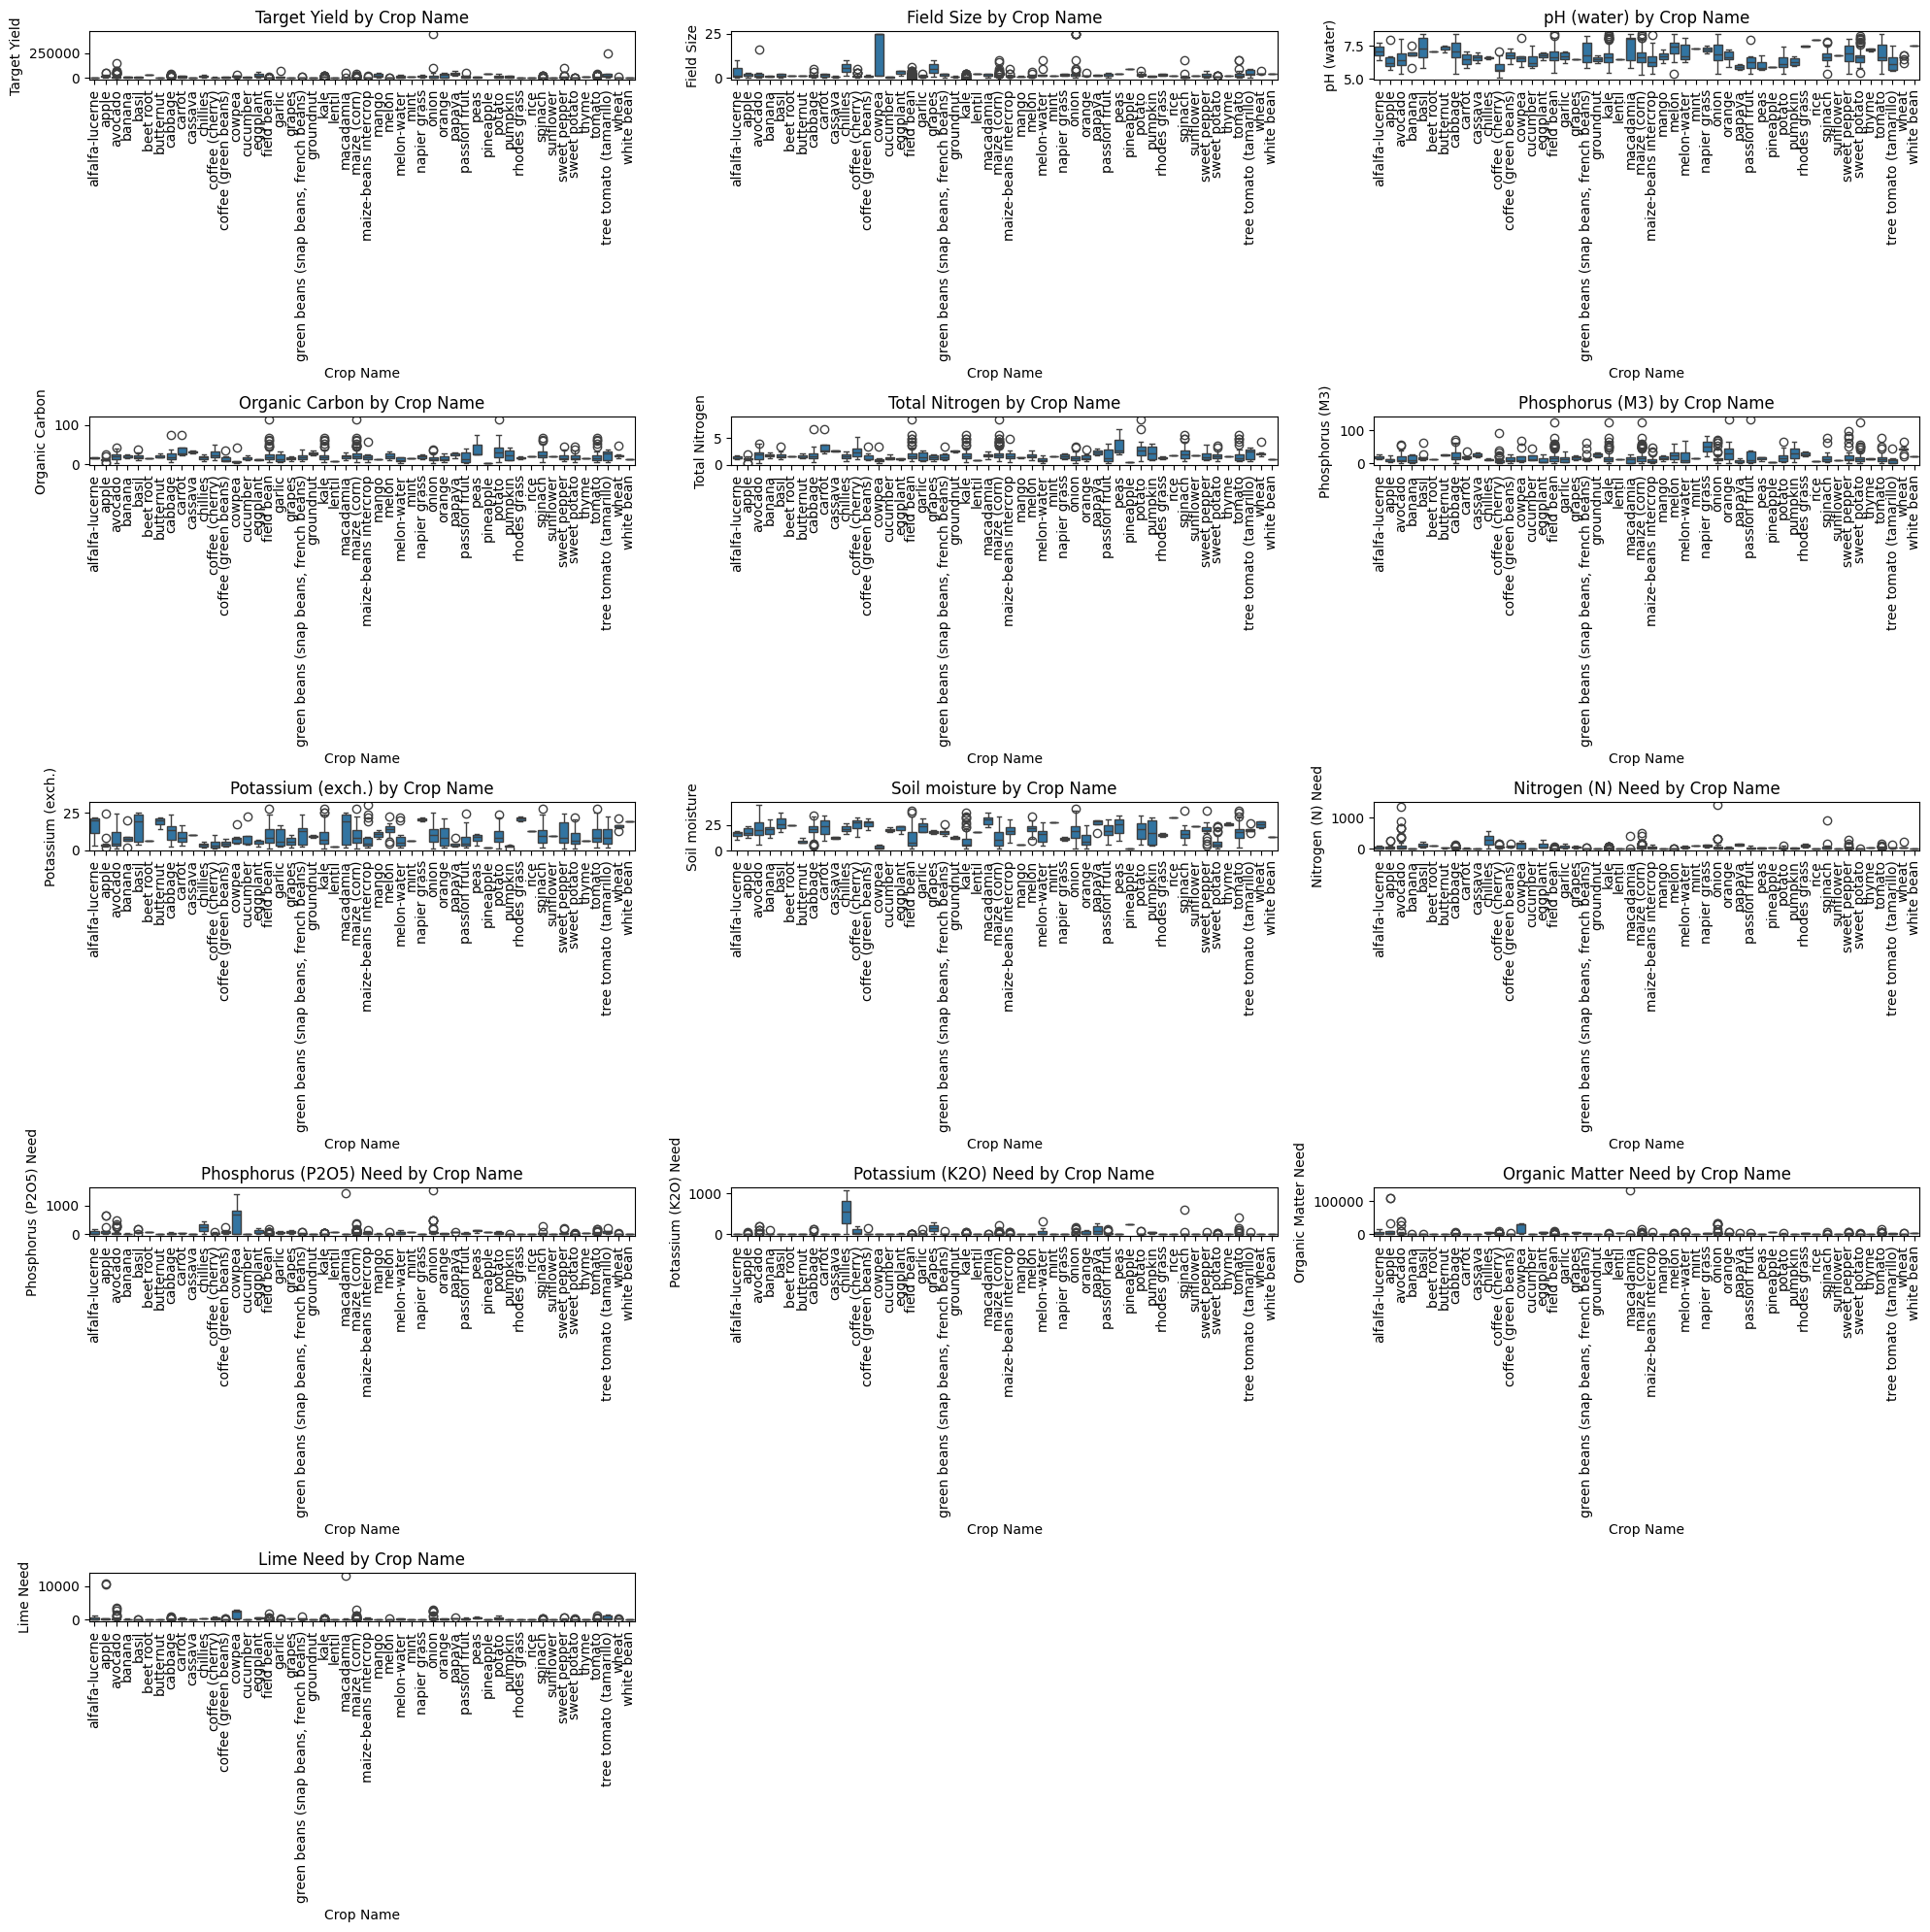

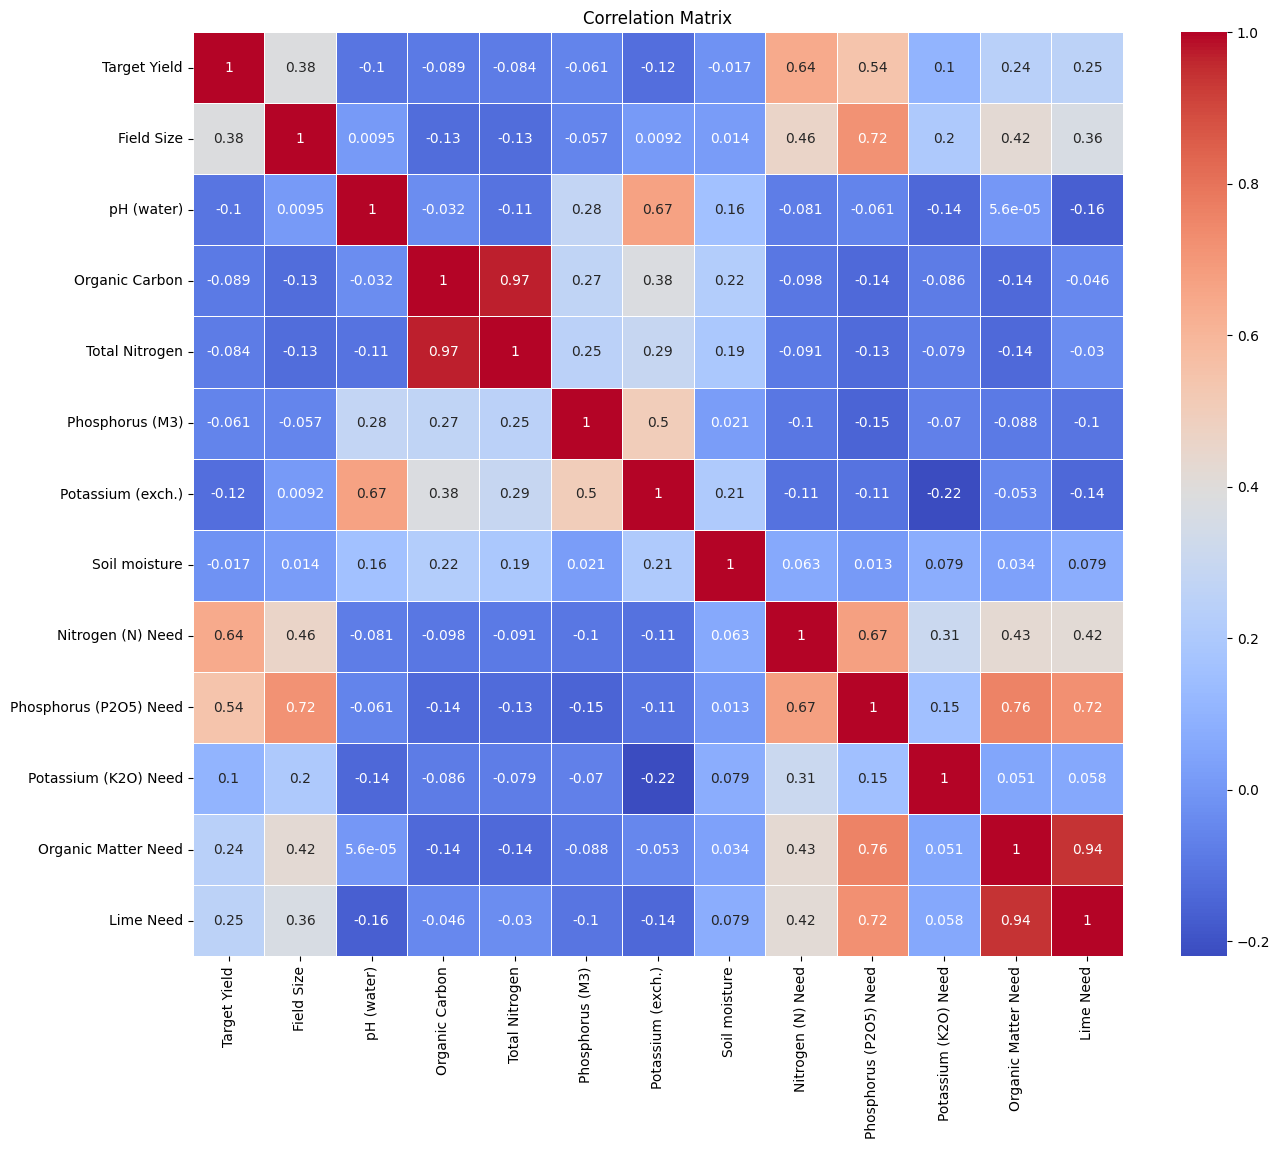

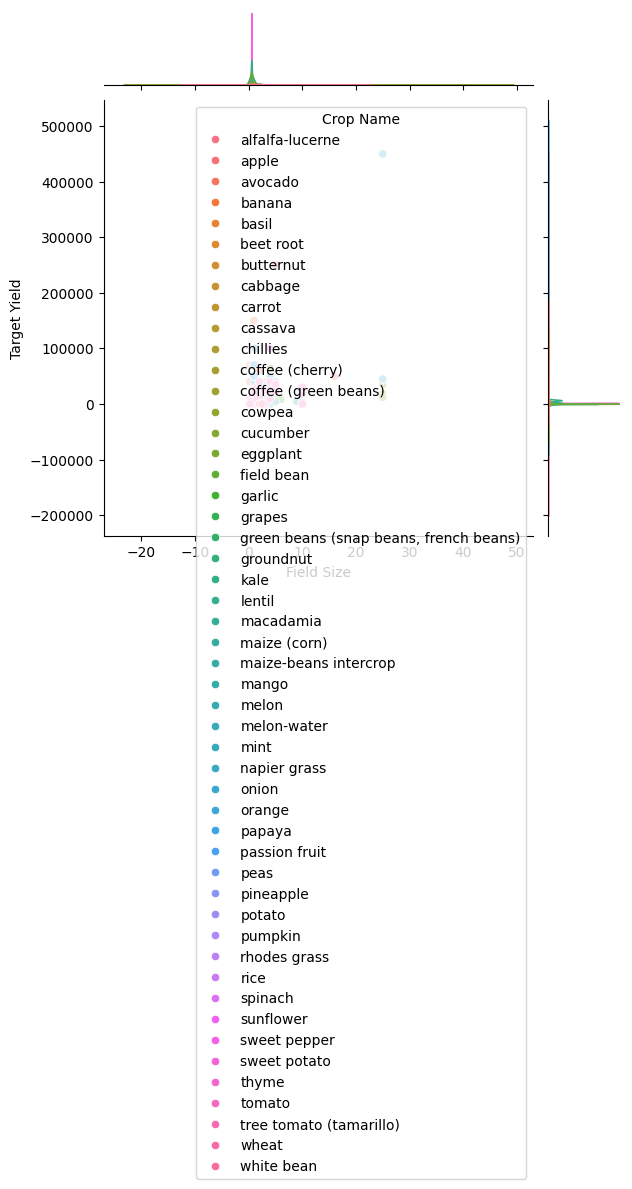

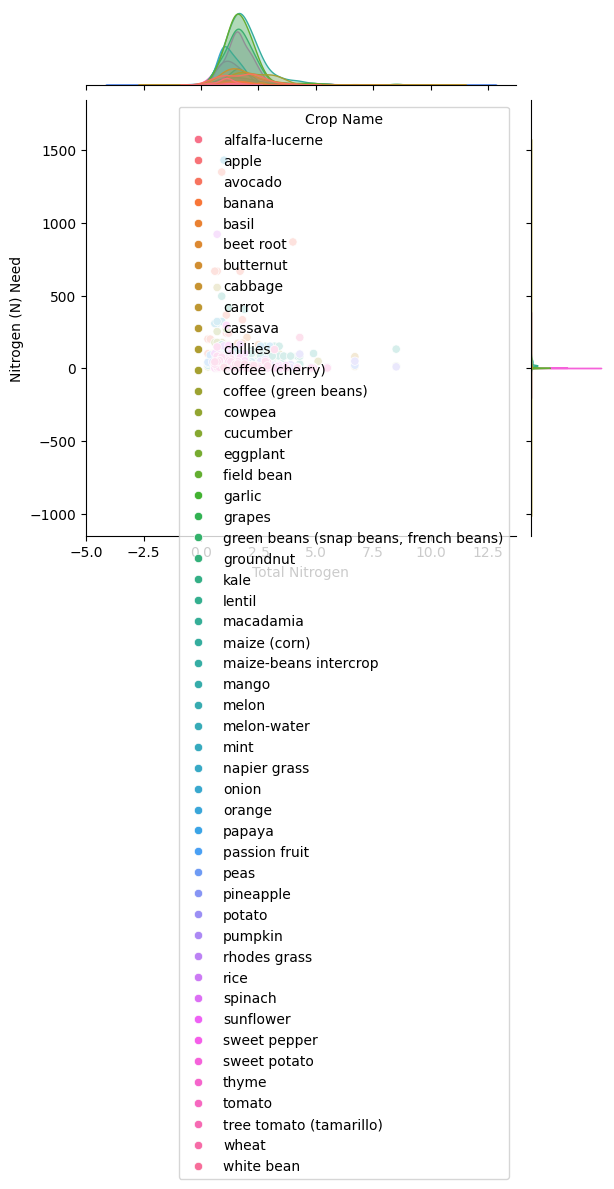

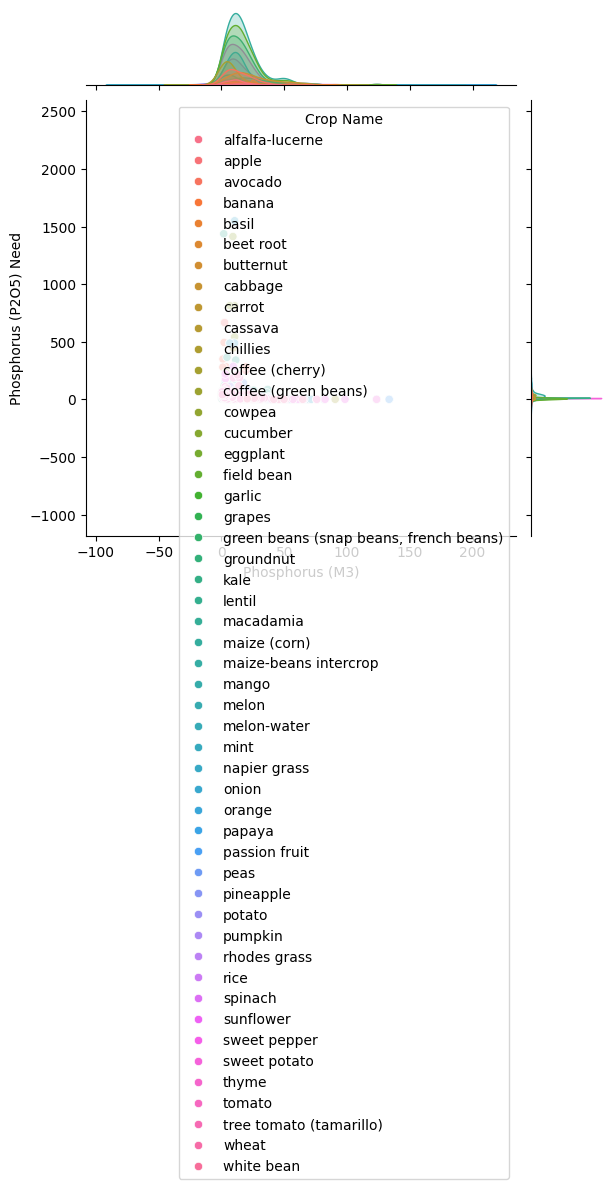

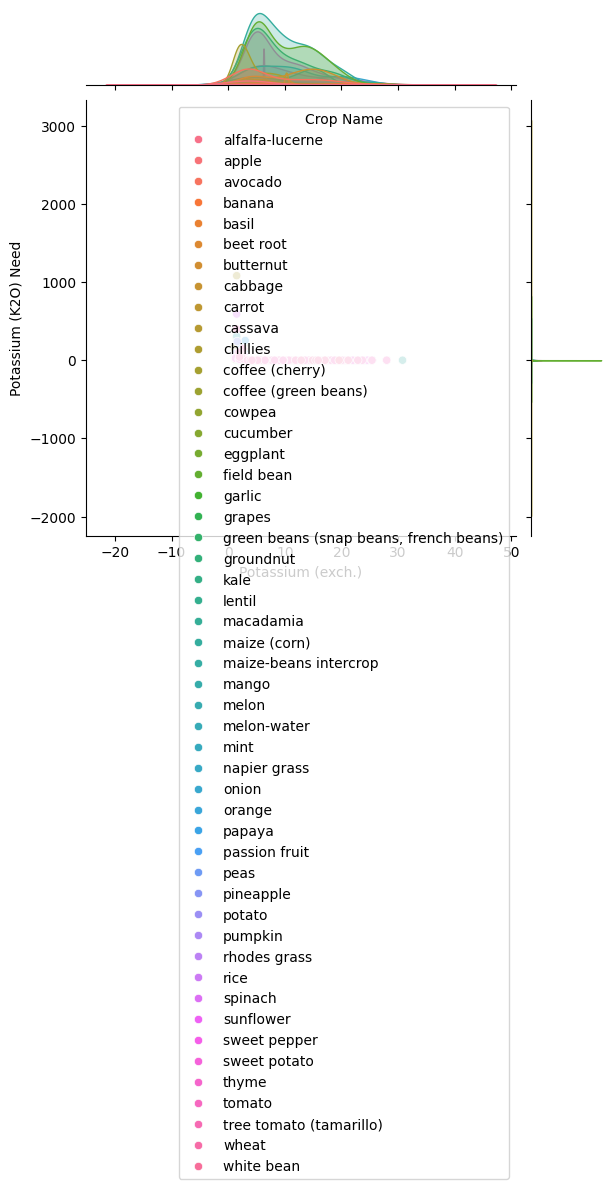

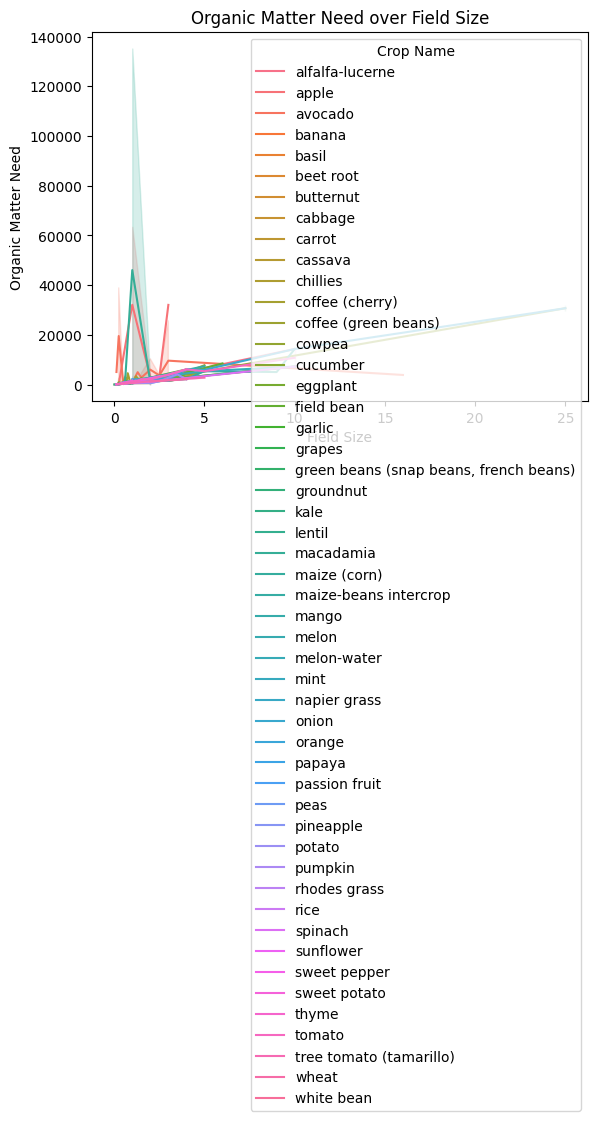

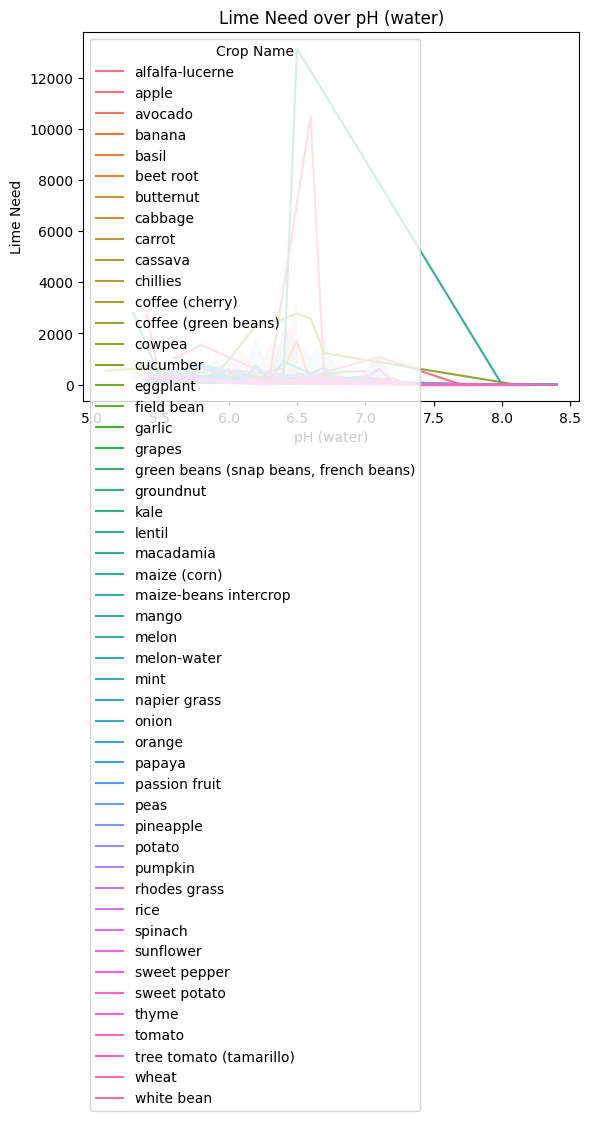

In [27]:
# Distribution of Continuous Variables
continuous_columns = ['Target Yield', 'Field Size', 'pH (water)', 'Organic Carbon', 'Total Nitrogen', 
                      'Phosphorus (M3)', 'Potassium (exch.)', 'Soil moisture', 
                      'Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 
                      'Organic Matter Need', 'Lime Need']

plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.6)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Pairplot to explore relationships between a few key variables
pairplot_columns = ['Target Yield', 'Field Size', 'pH (water)', 'Organic Carbon', 'Total Nitrogen', 
                    'Phosphorus (M3)', 'Potassium (exch.)']
sns.pairplot(df[pairplot_columns])
plt.show()

# Boxplot for 'Crop Name' vs Continuous Variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x='Crop Name', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} by Crop Name')
plt.tight_layout()
plt.show()

# Correlation matrix to understand relationships between variables
plt.figure(figsize=(15, 12))
corr_matrix = df[continuous_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for specific relationships
sns.jointplot(x="Field Size", y="Target Yield", data=df, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Total Nitrogen", y="Nitrogen (N) Need", data=df, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Phosphorus (M3)", y="Phosphorus (P2O5) Need", data=df, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Potassium (exch.)", y="Potassium (K2O) Need", data=df, kind='scatter', hue='Crop Name')
plt.show()

# Lineplot for 'Organic Matter Need' over 'Field Size'
sns.lineplot(data=df, x='Field Size', y='Organic Matter Need', hue='Crop Name')
plt.title('Organic Matter Need over Field Size')
plt.show()

# Lineplot for 'Lime Need' over 'pH (water)'
sns.lineplot(data=df, x='pH (water)', y='Lime Need', hue='Crop Name')
plt.title('Lime Need over pH (water)')
plt.show()

In [43]:
import pandas as pd

# Load your dataset from an Excel file, starting from the second row
df = pd.read_excel('/home/space/Project01/docs/fadhili1(2).xlsx', skiprows=1)  # Replace with the actual path

# Print the actual column names to inspect them
print("Columns in the dataset:")
print(df.columns)

# Define the input features and output target columns
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 
            'Potassium (K2O) Need', 'Organic Matter Need', 'Lime Need']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all specified columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features:
    print("The following input features are missing from the dataset:", missing_features)
if missing_outputs:
    print("The following output columns are missing from the dataset:", missing_outputs)

# Check for similar column names if any columns are missing
if missing_features or missing_outputs:
    print("Attempting to find similar column names for missing columns...")
    all_columns = df.columns
    similar_features = {col: [c for c in all_columns if col.lower() in c.lower()] for col in features if col not in all_columns}
    similar_outputs = {col: [c for c in all_columns if col.lower() in c.lower()] for col in output_columns if col not in all_columns}
    print("Similar input feature columns:", similar_features)
    print("Similar output columns:", similar_outputs)

# Proceed only if all necessary columns are present
if not missing_features and not missing_outputs:
    # Input features
    X = df[features].copy()  # Create a copy to avoid modifying the original DataFrame
    X.fillna(0, inplace=True)

    # Output targets
    y = df[output_columns].copy()  # Create a copy to avoid modifying the original DataFrame

    # Aggregate output columns to have only one row per sample
    y = y.mean(axis=1)  # Taking the mean value across columns

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=['Crop Name'])  

    # Print lengths of X, y, and df to debug
    print("Length of X:", len(X))
    print("Length of y:", len(y))
    print("Length of df:", len(df))

    # Check if X and y have a consistent number of samples
    if len(X) == len(y):
        print("X and y have a consistent number of samples.")
        print("Number of samples:", len(X))
    else:
        print("X and y have an inconsistent number of samples.")
else:
    print("Please ensure all necessary columns are present in the dataset before proceeding.")






Columns in the dataset:
Index(['Crop Name', 'Target Yield', 'Scanner User Email', 'Field Size',
       'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
Length of X: 1364
Length of y: 1364
Length of df: 1364
X and y have a consistent number of samples.
Number of samples: 1364


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check if X and y have the same number of samples
if len(X) != len(y):
    raise ValueError("X and y have inconsistent numbers of samples")

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)




In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from an Excel file, starting from the second row
df = pd.read_excel('/home/space/Project01/docs/fadhili1(2).xlsx', skiprows=1)  # Replace with the actual path

# Print the actual column names to inspect them
print("Columns in the dataset:")
print(df.columns)

# Define the input features and output target columns
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 
            'Potassium (K2O) Need', 'Organic Matter Need', 'Lime Need']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all specified columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features or missing_outputs:
    print("Missing features:", missing_features)
    print("Missing output columns:", missing_outputs)
else:
    # Input features
    X = df[features].copy()
    y = df[output_columns].copy()

    # Combine X and y to drop rows with NaN values in either
    combined = pd.concat([X, y], axis=1)
    combined.dropna(inplace=True)

    # Separate X and y again after dropping NaNs
    X = combined[features]
    y = combined[output_columns]

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=['Crop Name'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # If you really need a confusion matrix-like output for regression, you can bin the predicted and true values
    # into categories and then use sklearn's confusion_matrix function. This is not typical for regression.
    # from sklearn.metrics import confusion_matrix

    # Define bin edges
    # bins = [0, 50, 100, 150, 200]  # Example bin edges, adjust according to your data
    # y_test_binned = pd.cut(y_test.values.ravel(), bins=bins, labels=False)
    # y_pred_binned = pd.cut(y_pred.ravel(), bins=bins, labels=False)

    # Confusion matrix
    # cm = confusion_matrix(y_test_binned, y_pred_binned)
    # print("Confusion Matrix:")
    # print(cm)




Columns in the dataset:
Index(['Crop Name', 'Target Yield', 'Scanner User Email', 'Field Size',
       'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
Mean Squared Error: 1939.5666151404137
R^2 Score: 0.8352665195829334


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load your dataset from an Excel file, starting from the second row
df = pd.read_excel('/home/space/Project01/docs/fadhili1(2).xlsx', skiprows=1)  # Replace with the actual path

# Print the actual column names to inspect them
print("Columns in the dataset:")
print(df.columns)

# Define the input features and output target columns
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 
            'Potassium (K2O) Need', 'Organic Matter Need', 'Lime Need']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all specified columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features or missing_outputs:
    print("Missing features:", missing_features)
    print("Missing output columns:", missing_outputs)
else:
    # Input features
    X = df[features].copy()
    y = df[output_columns].copy()

    # Combine X and y to drop rows with NaN values in either
    combined = pd.concat([X, y], axis=1)
    combined.dropna(inplace=True)

    # Separate X and y again after dropping NaNs
    X = combined[features]
    y = combined[output_columns]

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=['Crop Name'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Save the model to a file
    model_filename = '/home/space/Project01/docs/random_forest_model.joblib'
    joblib.dump(model, model_filename)
    print(f"Model saved to {model_filename}")

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # If you really need a confusion matrix-like output for regression, you can bin the predicted and true values
    # into categories and then use sklearn's confusion_matrix function. This is not typical for regression.
    # from sklearn.metrics import confusion_matrix

    # Define bin edges
    # bins = [0, 50, 100, 150, 200]  # Example bin edges, adjust according to your data
    # y_test_binned = pd.cut(y_test.values.ravel(), bins=bins, labels=False)
    # y_pred_binned = pd.cut(y_pred.ravel(), bins=bins, labels=False)

    # Confusion matrix
    # cm = confusion_matrix(y_test_binned, y_pred_binned)
    # print("Confusion Matrix:")
    # print(cm)


Columns in the dataset:
Index(['Crop Name', 'Target Yield', 'Scanner User Email', 'Field Size',
       'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
Model saved to /home/space/Project01/docs/random_forest_model.joblib
Mean Squared Error: 1939.5666151404137
R^2 Score: 0.8352665195829334
